In [ ]:
Rohan Goyal
AI with Python
1:30 to 5:30

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from warnings import simplefilter

In [7]:
digits=load_digits()

In [8]:
print('image data shape',digits.data.shape)
print('label data shape',digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


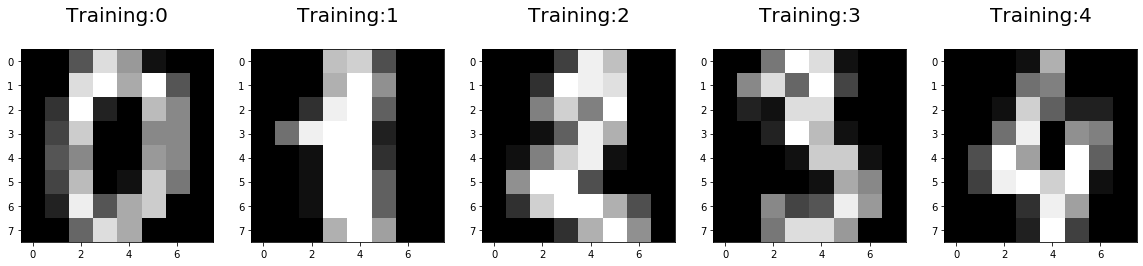

In [12]:
plt.figure(figsize=(20,40))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training:%i\n"% label,fontsize=20)

In [24]:
x_train, x_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1383, 64) (414, 64) (1383,) (414,)


In [30]:
logist=LogisticRegression()
logist.fit(x_train,y_train)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred=logist.predict(x_test)
score =logist.score(x_test,y_test)
print(score)

0.9516908212560387


[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1, 'Accuracy Score: 0.9516908212560387')

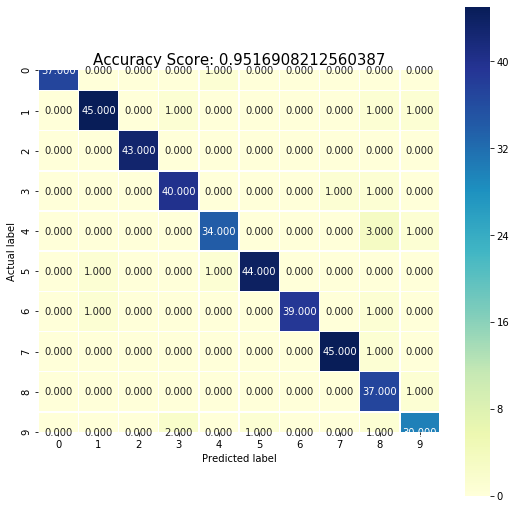

In [33]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap = 'YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

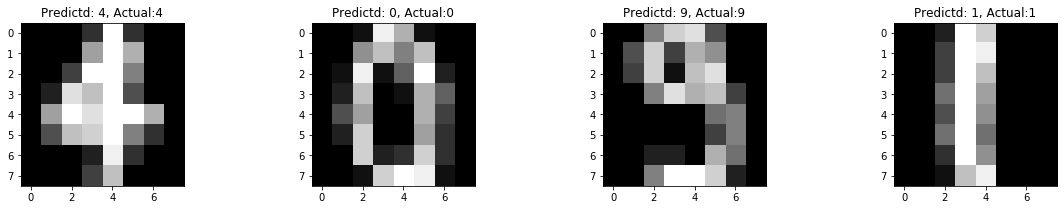

In [37]:
index=0
misclassifiedIndex= []
for predict,actual in zip(pred,y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
        index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predictd: {}, Actual:{}".format(pred[wrong],y_test[wrong], fontsize=20))